In [ ]:
def load_questions(activation_f, question_f, max_size = -1):
    activations_file = "/Users/daniel/ideaProjects/allennlp/" + activation_f
    questions_file = "/Users/daniel/ideaProjects/allennlp/" + question_f
    features = []
    pred_ans = []
    with open(activations_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
            # print(i)
            # print(l[0:100])

            if (max_size > -1 and len(pred_ans) > max_size):
                break

            if i % 2 == 0:
                # print(l)
                data = json.loads(l)
                features.append(data)
            else:
                pred_ans.append(l)



    questions = []
    labels = []
    with open(questions_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
            print(i)
            print(l[0:100])
            if i % 3 == 0:
                questions.append({})
                questions[int(i / 3)]["q"] = l
            elif i % 3 == 1:
                questions[int(i / 3)]["p"] = l
            elif i % 3 == 2:
                ans = json.loads(l)
                questions[int(i / 3)]["a"] = [c['text'] for c in ans]
                labels.append(ans[0]['text'])

            if (max_size > -1 and len(labels) > max_size):
                break
    mat = numpy.array(features)

    return (mat, labels, questions, pred_ans)

In [4]:
import json
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

(mat, labels, questions, pred_ans) = load_questions("out3.txt", "out22.txt", max_size=0)
(mat_ad, labels_ad, questions_ad, pred_ans_ad) = load_questions("out33-adv.txt", "out22-adv.txt", max_size=-1)

# read the questions and remember question ids:
question_paragraph_id_map = {}
ff = "/Users/daniel/ideaProjects/allennlp/QA_datasets/babi-test.json"
with open(ff) as file:
    dataset_json = json.load(file)
    dataset = dataset_json['data']
    for article in dataset:
        for paragraph in article['paragraphs']:
            for qa in paragraph['qas']:
                key = qa['question'] + paragraph['context']
                id = qa['id']
                question_paragraph_id_map[key] = id

bibi_reasoning_types = [question_paragraph_id_map[x["q"]+x["p"]] for x in questions_ad]

0
Which NFL team represented the AFC at Super Bowl 50?
1
Super Bowl 50 was an American football game to determine the champion of the National Football Leagu
2
[{"answer_start": 177, "text": "Denver Broncos"}, {"answer_start": 177, "text": "Denver Broncos"}, {
0
Why did jason go to the kitchen?
1
Jason is thirsty. Antoine is bored. Jason went to the kitchen. Antoine journeyed to the garden. Sumi
2
[{"answer_start": 9, "text": "thirsty"}]
3
Why did antoine go to the garden?
4
Jason is thirsty. Antoine is bored. Jason went to the kitchen. Antoine journeyed to the garden. Sumi
5
[{"answer_start": 29, "text": "bored"}]
6
Why did yann go to the kitchen?
7
Yann is thirsty. Yann travelled to the kitchen.
8
[{"answer_start": 8, "text": "thirsty"}]
9
Why did yann go to the kitchen?
10
Yann is thirsty. Yann journeyed to the kitchen. Yann took the milk there. Jason is hungry. Antoine i
11
[{"answer_start": 8, "text": "thirsty"}]
12
Why did yann get the milk?
13
Yann is thirsty. Yann journeyed to 

Where was Mary before the kitchen?
982
Yesterday Julie went to the bedroom. Yesterday Bill journeyed to the office. This morning Mary went 
983
[{"answer_start": 149, "text": "school"}]
984
Where was Julie before the office?
985
Julie journeyed to the park yesterday. This morning Julie moved to the office. Bill journeyed to the
986
[{"answer_start": 23, "text": "park"}]
987
Where was Julie before the office?
988
Julie journeyed to the park yesterday. This morning Julie moved to the office. Bill journeyed to the
989
[{"answer_start": 23, "text": "park"}]
990
Where was Bill before the kitchen?
991
This morning Bill journeyed to the kitchen. Yesterday Bill went to the bedroom. Julie went back to t
992
[{"answer_start": 71, "text": "bedroom"}]
993
Where was Bill before the kitchen?
994
This morning Bill journeyed to the kitchen. Yesterday Bill went to the bedroom. Julie went back to t
995
[{"answer_start": 71, "text": "bedroom"}]
996
Where was Bill before the kitchen?
997
This morning Bill

What is Mary carrying?
1732
Mary picked up the football there. Sandra went to the hallway. Daniel went to the office. Daniel jou
1733
[{"answer_start": 19, "text": "football"}]
1734
What is Mary carrying?
1735
Mary picked up the football there. Sandra went to the hallway. Daniel went to the office. Daniel jou
1736
[{"answer_start": 19, "text": "football"}]
1737
What is Mary carrying?
1738
John moved to the garden. Sandra went to the office. Daniel moved to the bathroom. Mary took the mil
1739
[{"answer_start": 97, "text": "milk"}]
1740
What is Mary carrying?
1741
John moved to the garden. Sandra went to the office. Daniel moved to the bathroom. Mary took the mil
1742
[{"answer_start": 97, "text": "milk"}]
1743
What is Sandra carrying?
1744
Sandra took the milk there. John got the apple there. Sandra went to the garden. Mary moved to the b
1745
[{"answer_start": 16, "text": "milk"}]
1746
What is John carrying?
1747
Sandra took the milk there. John got the apple there. Sandra went to the

2481
What is Mary carrying?
2482
Sandra moved to the office. Mary picked up the milk there. Daniel grabbed the football there. Daniel
2483
[{"answer_start": 47, "text": "milk"}]
2484
What is Sandra carrying?
2485
Sandra took the football there. Mary went back to the hallway. Mary travelled to the office. John we
2486
[{"answer_start": 16, "text": "football"}]
2487
What is Sandra carrying?
2488
Sandra took the football there. Mary went back to the hallway. Mary travelled to the office. John we
2489
[{"answer_start": 16, "text": "football"}]
2490
What is Daniel carrying?
2491
Mary travelled to the garden. Sandra journeyed to the bedroom. Daniel grabbed the football there. Sa
2492
[{"answer_start": 82, "text": "football"}]
2493
What is Daniel carrying?
2494
Mary travelled to the garden. Sandra journeyed to the bedroom. Daniel grabbed the football there. Sa
2495
[{"answer_start": 82, "text": "football"}]
2496
What is John carrying?
2497
Daniel travelled to the hallway. Daniel travelled to 

3388
Daniel journeyed to the kitchen. Sandra went to the bedroom. Daniel went back to the hallway. Mary w
3389
[{"answer_start": 24, "text": "kitchen"}]
3390
Where is Daniel?
3391
Daniel journeyed to the kitchen. Sandra went to the bedroom. Daniel went back to the hallway. Mary w
3392
[{"answer_start": 85, "text": "hallway"}]
3393
Where is Sandra?
3394
Daniel journeyed to the kitchen. Sandra went to the bedroom. Daniel went back to the hallway. Mary w
3395
[{"answer_start": 52, "text": "bedroom"}]
3396
Where is John?
3397
John went back to the bathroom. John went to the bedroom. Daniel travelled to the bedroom. Sandra jo
3398
[{"answer_start": 49, "text": "bedroom"}]
3399
Where is Sandra?
3400
John went back to the bathroom. John went to the bedroom. Daniel travelled to the bedroom. Sandra jo
3401
[{"answer_start": 115, "text": "garden"}]
3402
Where is Sandra?
3403
John went back to the bathroom. John went to the bedroom. Daniel travelled to the bedroom. Sandra jo
3404
[{"answer_start"

4229
[{"answer_start": 108, "text": "garden"}]
4230
Where is John?
4231
Mary went to the bedroom. John moved to the bathroom. Sandra went back to the office. John travelled
4232
[{"answer_start": 171, "text": "hallway"}]
4233
Where is John?
4234
John went back to the bedroom. John journeyed to the garden. Daniel journeyed to the bathroom. Sandr
4235
[{"answer_start": 53, "text": "garden"}]
4236
Where is John?
4237
John went back to the bedroom. John journeyed to the garden. Daniel journeyed to the bathroom. Sandr
4238
[{"answer_start": 53, "text": "garden"}]
4239
Where is Daniel?
4240
John went back to the bedroom. John journeyed to the garden. Daniel journeyed to the bathroom. Sandr
4241
[{"answer_start": 119, "text": "kitchen"}]
4242
Where is John?
4243
Mary went back to the kitchen. John went to the bedroom. Daniel went back to the hallway. Mary moved
4244
[{"answer_start": 48, "text": "bedroom"}]
4245
Where is Daniel?
4246
Mary went back to the kitchen. John went to the bedroom. Da

Daniel dropped the apple. John travelled to the bedroom. Daniel went back to the garden. John journe
5231
[{"answer_start": 81, "text": "garden"}]
5232
Where is the football?
5233
Daniel dropped the apple. John travelled to the bedroom. Daniel went back to the garden. John journe
5234
[{"answer_start": 81, "text": "garden"}]
5235
Where is the football?
5236
Daniel dropped the apple. John travelled to the bedroom. Daniel went back to the garden. John journe
5237
[{"answer_start": 81, "text": "garden"}]
5238
Where is the football?
5239
Daniel journeyed to the hallway. Sandra journeyed to the bathroom. Mary moved to the bedroom. Sandra
5240
[{"answer_start": 241, "text": "garden"}]
5241
Where is the apple?
5242
Daniel went to the office. Daniel picked up the football there. John journeyed to the hallway.
5243
[{"answer_start": 86, "text": "hallway"}]
5244
Where is the apple?
5245
Mary went back to the garden. Mary grabbed the milk there. Sandra went to the hallway. Mary got the 
5246
[{"a

6096
Where is Sandra?
6097
Mary went to the kitchen. Afterwards she journeyed to the hallway. Daniel moved to the kitchen. Afte
6098
[{"answer_start": 58, "text": "hallway"}]
6099
Where is Sandra?
6100
Sandra went back to the garden. Following that she went back to the bathroom. John moved to the bath
6101
[{"answer_start": 68, "text": "bathroom"}]
6102
Where is Sandra?
6103
Sandra went back to the garden. Following that she went back to the bathroom. John moved to the bath
6104
[{"answer_start": 68, "text": "bathroom"}]
6105
Where is Sandra?
6106
Sandra went back to the garden. Following that she went back to the bathroom. John moved to the bath
6107
[{"answer_start": 68, "text": "bathroom"}]
6108
Where is John?
6109
John travelled to the hallway. After that he moved to the bathroom. Mary went to the bathroom. Then 
6110
[{"answer_start": 58, "text": "bathroom"}]
6111
Where is Mary?
6112
John travelled to the hallway. After that he moved to the bathroom. Mary went to the bathroom. The

6980
[{"answer_start": 134, "text": "bedroom"}]
6981
Where is Sandra?
6982
Sandra moved to the garden. Then she went to the bedroom. Sandra moved to the garden. After that she
6983
[{"answer_start": 49, "text": "bedroom"}]
6984
Where is Sandra?
6985
Sandra moved to the garden. Then she went to the bedroom. Sandra moved to the garden. After that she
6986
[{"answer_start": 118, "text": "hallway"}]
6987
Where is Sandra?
6988
Sandra moved to the garden. Then she went to the bedroom. Sandra moved to the garden. After that she
6989
[{"answer_start": 118, "text": "hallway"}]
6990
Where is John?
6991
John went back to the bedroom. Afterwards he went to the office. Daniel went back to the office. Aft
6992
[{"answer_start": 57, "text": "office"}]
6993
Where is Daniel?
6994
John went back to the bedroom. Afterwards he went to the office. Daniel went back to the office. Aft
6995
[{"answer_start": 123, "text": "bathroom"}]
6996
Where is Daniel?
6997
John went back to the bedroom. Afterwards he went

[{"answer_start": 27, "text": "bathroom"}]
7980
What is the office west of?
7981
The garden is east of the office. The garden is west of the bathroom.
7982
[{"answer_start": 4, "text": "garden"}]
7983
What is south of the bedroom?
7984
The hallway is south of the garden. The garden is south of the bedroom.
7985
[{"answer_start": 28, "text": "garden"}]
7986
What is south of the office?
7987
The garden is south of the kitchen. The kitchen is south of the office.
7988
[{"answer_start": 27, "text": "kitchen"}]
7989
What is east of the bathroom?
7990
The hallway is east of the bathroom. The office is west of the bathroom.
7991
[{"answer_start": 4, "text": "hallway"}]
7992
What is the kitchen east of?
7993
The hallway is west of the bathroom. The bathroom is west of the kitchen.
7994
[{"answer_start": 27, "text": "bathroom"}]
7995
What is the office east of?
7996
The office is west of the bedroom. The bathroom is west of the office.
7997
[{"answer_start": 39, "text": "bathroom"}]
7998
What i

What is east of the bathroom?
8980
The bathroom is east of the garden. The hallway is east of the bathroom.
8981
[{"answer_start": 40, "text": "hallway"}]
8982
What is south of the bedroom?
8983
The hallway is north of the bedroom. The bathroom is south of the bedroom.
8984
[{"answer_start": 41, "text": "bathroom"}]
8985
What is west of the bathroom?
8986
The kitchen is east of the bathroom. The hallway is west of the bathroom.
8987
[{"answer_start": 41, "text": "hallway"}]
8988
What is the bedroom south of?
8989
The hallway is south of the bedroom. The kitchen is north of the bedroom.
8990
[{"answer_start": 41, "text": "kitchen"}]
8991
What is west of the bedroom?
8992
The garden is west of the bedroom. The bathroom is east of the bedroom.
8993
[{"answer_start": 4, "text": "garden"}]
8994
What is the office north of?
8995
The garden is south of the office. The kitchen is north of the office.
8996
[{"answer_start": 4, "text": "garden"}]
8997
What is north of the bathroom?
8998
The bedr

9979
The office is south of the hallway. The garden is north of the hallway.
9980
[{"answer_start": 40, "text": "garden"}]
9981
What is east of the garden?
9982
The bathroom is west of the kitchen. The bathroom is east of the garden.
9983
[{"answer_start": 4, "text": "bathroom"}]
9984
What is the garden west of?
9985
The garden is east of the kitchen. The bathroom is east of the garden.
9986
[{"answer_start": 39, "text": "bathroom"}]
9987
What is the bedroom west of?
9988
The hallway is east of the bedroom. The kitchen is east of the hallway.
9989
[{"answer_start": 4, "text": "hallway"}]
9990
What is east of the kitchen?
9991
The kitchen is east of the hallway. The bedroom is east of the kitchen.
9992
[{"answer_start": 40, "text": "bedroom"}]
9993
What is east of the office?
9994
The kitchen is east of the office. The bathroom is east of the kitchen.
9995
[{"answer_start": 4, "text": "kitchen"}]
9996
What is the office east of?
9997
The garden is west of the office. The hallway is west

10979
[{"answer_start": 19, "text": "football"}]
10980
Who gave the football to Jeff?
10981
Fred picked up the football there. Fred gave the football to Jeff. Bill went back to the bathroom. J
10982
[{"answer_start": 0, "text": "Fred"}]
10983
What did Fred give to Jeff?
10984
Fred picked up the football there. Fred gave the football to Jeff. Bill went back to the bathroom. J
10985
[{"answer_start": 19, "text": "football"}]
10986
Who gave the apple?
10987
Mary moved to the hallway. Jeff moved to the garden. Jeff got the apple there. Mary journeyed to the
10988
[{"answer_start": 27, "text": "Jeff"}]
10989
Who received the milk?
10990
Fred journeyed to the bedroom. Fred got the milk there. Fred went back to the kitchen. Bill picked u
10991
[{"answer_start": 146, "text": "Mary"}]
10992
Who received the football?
10993
Fred got the football there. Fred travelled to the garden. Fred passed the football to Jeff. Mary we
10994
[{"answer_start": 87, "text": "Jeff"}]
10995
Who gave the football 

[{"answer_start": 120, "text": "Jeff"}]
11979
Who received the apple?
11980
Bill picked up the apple there. Bill journeyed to the bedroom. Bill travelled to the bathroom. Bill 
11981
[{"answer_start": 120, "text": "Jeff"}]
11982
Who received the apple?
11983
Mary passed the apple to Bill. Mary travelled to the kitchen. Bill left the apple there.
11984
[{"answer_start": 25, "text": "Bill"}]
11985
Who gave the apple to Bill?
11986
Mary passed the apple to Bill. Mary travelled to the kitchen. Bill left the apple there.
11987
[{"answer_start": 0, "text": "Mary"}]
11988
Who gave the football?
11989
Fred gave the football to Mary. Jeff journeyed to the office. Jeff journeyed to the bedroom.
11990
[{"answer_start": 0, "text": "Fred"}]
11991
Who received the football?
11992
Fred gave the football to Mary. Jeff journeyed to the office. Jeff journeyed to the bedroom.
11993
[{"answer_start": 26, "text": "Mary"}]
11994
Who gave the apple?
11995
Fred took the apple there. Fred moved to the garden. 

12819
Where is Mary?
12820
Daniel and Mary went back to the hallway. Following that they went to the bathroom. John and Mary tr
12821
[{"answer_start": 153, "text": "garden"}]
12822
Where is Mary?
12823
Daniel and Mary went back to the hallway. Following that they went to the bathroom. John and Mary tr
12824
[{"answer_start": 234, "text": "bedroom"}]
12825
Where is Mary?
12826
Mary and John went to the hallway. Afterwards they travelled to the bedroom. Daniel and Mary went ba
12827
[{"answer_start": 68, "text": "bedroom"}]
12828
Where is Daniel?
12829
Mary and John went to the hallway. Afterwards they travelled to the bedroom. Daniel and Mary went ba
12830
[{"answer_start": 26, "text": "hallway"}]
12831
Where is Daniel?
12832
Mary and John went to the hallway. Afterwards they travelled to the bedroom. Daniel and Mary went ba
12833
[{"answer_start": 229, "text": "bathroom"}]
12834
Where is Sandra?
12835
Mary and Sandra travelled to the office. Then they moved to the garden. Mary and San

13728
Where is Mary?
13729
Daniel and Mary journeyed to the kitchen. Following that they journeyed to the bathroom. Daniel and 
13730
[{"answer_start": 147, "text": "hallway"}]
13731
Where is Sandra?
13732
Daniel and Mary journeyed to the kitchen. Following that they journeyed to the bathroom. Daniel and 
13733
[{"answer_start": 117, "text": "garden"}]
13734
Where is John?
13735
Mary and John went back to the bathroom. After that they went to the garden. Daniel and Mary journey
13736
[{"answer_start": 69, "text": "garden"}]
13737
Where is Daniel?
13738
Mary and John went back to the bathroom. After that they went to the garden. Daniel and Mary journey
13739
[{"answer_start": 155, "text": "bedroom"}]
13740
Where is Mary?
13741
Mary and John went back to the bathroom. After that they went to the garden. Daniel and Mary journey
13742
[{"answer_start": 155, "text": "bedroom"}]
13743
Where is Daniel?
13744
Daniel and John travelled to the office. Then they went to the bathroom. Mary and Dan

14617
Sandra and Mary moved to the bathroom. Sandra and John went to the hallway. Mary and Sandra journeye
14618
[{"answer_start": 29, "text": "bathroom"}]
14619
Where is Sandra?
14620
Sandra and Mary moved to the bathroom. Sandra and John went to the hallway. Mary and Sandra journeye
14621
[{"answer_start": 109, "text": "kitchen"}]
14622
Where is Sandra?
14623
Sandra and Mary moved to the bathroom. Sandra and John went to the hallway. Mary and Sandra journeye
14624
[{"answer_start": 149, "text": "garden"}]
14625
Where is John?
14626
Sandra and John went to the garden. Mary and John moved to the kitchen. John and Daniel travelled to
14627
[{"answer_start": 63, "text": "kitchen"}]
14628
Where is Daniel?
14629
Sandra and John went to the garden. Mary and John moved to the kitchen. John and Daniel travelled to
14630
[{"answer_start": 105, "text": "hallway"}]
14631
Where is Daniel?
14632
Sandra and John went to the garden. Mary and John moved to the kitchen. John and Daniel travelled to
14

Where is Sandra?
15478
Sandra and Mary went back to the hallway. Daniel and John travelled to the kitchen. Sandra and John 
15479
[{"answer_start": 235, "text": "bedroom"}]
15480
Where is Daniel?
15481
Daniel and Mary journeyed to the bedroom. Mary and Sandra moved to the bathroom. Sandra and John jou
15482
[{"answer_start": 33, "text": "bedroom"}]
15483
Where is Sandra?
15484
Daniel and Mary journeyed to the bedroom. Mary and Sandra moved to the bathroom. Sandra and John jou
15485
[{"answer_start": 33, "text": "bedroom"}]
15486
Where is Sandra?
15487
Daniel and Mary journeyed to the bedroom. Mary and Sandra moved to the bathroom. Sandra and John jou
15488
[{"answer_start": 71, "text": "bathroom"}]
15489
Where is Daniel?
15490
Daniel and Sandra travelled to the office. John and Daniel travelled to the kitchen. John and Daniel
15491
[{"answer_start": 76, "text": "kitchen"}]
15492
Where is Sandra?
15493
Daniel and Sandra travelled to the office. John and Daniel travelled to the kitchen. 

John picked up the football. John picked up the apple. John left the football. John moved to the off
16478
[{"answer_start": 1116, "text": "garden"}]
16479
Where was the apple before the hallway?
16480
Sandra grabbed the apple there. John travelled to the hallway. Daniel went back to the garden. Sandr
16481
[{"answer_start": 115, "text": "bathroom"}]
16482
Where was the apple before the kitchen?
16483
Sandra grabbed the apple there. John travelled to the hallway. Daniel went back to the garden. Sandr
16484
[{"answer_start": 228, "text": "office"}]
16485
Where was the apple before the kitchen?
16486
Sandra grabbed the apple there. John travelled to the hallway. Daniel went back to the garden. Sandr
16487
[{"answer_start": 228, "text": "office"}]
16488
Where was the milk before the bedroom?
16489
Sandra grabbed the apple there. John travelled to the hallway. Daniel went back to the garden. Sandr
16490
[{"answer_start": 54, "text": "hallway"}]
16491
Where was the milk before the garden?
1

17477
[{"answer_start": 139, "text": "garden"}]
17478
Where was the apple before the office?
17479
Daniel journeyed to the bathroom. Sandra put down the apple. Mary picked up the apple. John moved to
17480
[{"answer_start": 139, "text": "garden"}]
17481
Where was the apple before the office?
17482
Daniel journeyed to the bathroom. Sandra put down the apple. Mary picked up the apple. John moved to
17483
[{"answer_start": 139, "text": "garden"}]
17484
Where was the apple before the garden?
17485
Mary went to the bedroom. Mary went back to the garden. Sandra travelled to the bedroom. John journe
17486
[{"answer_start": 17, "text": "bedroom"}]
17487
Where was the apple before the garden?
17488
Mary went to the bedroom. Mary went back to the garden. Sandra travelled to the bedroom. John journe
17489
[{"answer_start": 17, "text": "bedroom"}]
17490
Where was the apple before the bedroom?
17491
Mary went to the bedroom. Mary went back to the garden. Sandra travelled to the bedroom. John journe

18457
Sandra went to the kitchen. Mary went back to the office. Daniel took the milk. John moved to the ha
18458
[{"answer_start": 301, "text": "garden"}]
18459
Where was the apple before the bathroom?
18460
John picked up the football. John left the football there. Daniel took the apple. Sandra took the fo
18461
[{"answer_start": 253, "text": "bedroom"}]
18462
Where was the football before the kitchen?
18463
John picked up the football. John left the football there. Daniel took the apple. Sandra took the fo
18464
[{"answer_start": 159, "text": "hallway"}]
18465
Where was the football before the kitchen?
18466
John picked up the football. John left the football there. Daniel took the apple. Sandra took the fo
18467
[{"answer_start": 159, "text": "hallway"}]
18468
Where was the football before the kitchen?
18469
John picked up the football. John left the football there. Daniel took the apple. Sandra took the fo
18470
[{"answer_start": 159, "text": "hallway"}]
18471
Where was the footbal

[{"answer_start": 35, "text": "no"}]
19227
Is Mary in the bedroom?
19228
Mary went back to the kitchen. Mary is in the office. Daniel is in the bathroom. Sandra is not in th
19229
[{"answer_start": 91, "text": "no"}]
19230
Is John in the hallway?
19231
Sandra moved to the garden. John moved to the hallway. Daniel moved to the garden. John is not in th
19232
[{"answer_start": 91, "text": "no"}]
19233
Is Mary in the hallway?
19234
Sandra moved to the garden. John moved to the hallway. Daniel moved to the garden. John is not in th
19235
[{"answer_start": 91, "text": "no"}]
19236
Is John in the hallway?
19237
Daniel travelled to the bathroom. Sandra travelled to the bathroom. Daniel is not in the bathroom. J
19238
[{"answer_start": 78, "text": "no"}]
19239
Is Daniel in the bathroom?
19240
Daniel travelled to the bathroom. Sandra travelled to the bathroom. Daniel is not in the bathroom. J
19241
[{"answer_start": 78, "text": "no"}]
19242
Is Mary in the office?
19243
Sandra is in the hallway.

basic-deduction -> 9.035845915712434
simple-negation -> 20.300111551383658
agents-motivations -> 24.04645354645355
two-arg-relations -> 52.1950521950522
three-arg-relations -> 67.59088676155083
compound-coreference -> 8.451739352293382
single-supporting-fact -> 35.772348606559156
three-supporting-facts -> 3.8784005754064124
time-reasoning -> 28.775954581718683
basic-coreference -> 4.867682419284248
conjunction -> 27.5323685213614
two-supporting-facts -> 7.996099424726351
lists-sets -> 78.49535988565779


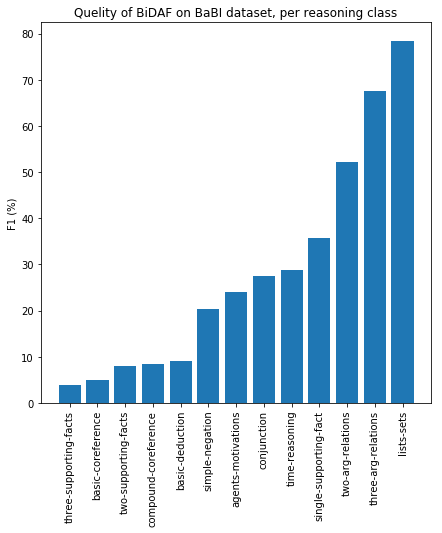

In [23]:
from evaluate11 import metric_max_over_ground_truths, f1_score, exact_match_score

# find the quality per reasoning type
scores = []
unique_types111 = set(bibi_reasoning_types)
for c in unique_types111:
    predictions_a = np.array([pred_ans_ad[i] for i, r in enumerate(bibi_reasoning_types) if r == c])
    labels_a = np.array([labels_ad[i] for i, r in enumerate(bibi_reasoning_types) if r == c])
    similarity = [f1_score(x,y) for x,y in zip(predictions_a, labels_a)]
    assert len(predictions_a) == len(labels_a)
    print(str(c) + " -> " + str(100.0 * sum(similarity) / len(predictions_a)))
    scores.append(100.0 * sum(similarity) / len(predictions_a))

similarity = [f1_score(x,y) for x,y in zip(pred_ans, labels)]


import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(7, 7))

scores_zipped_labels = list(zip(scores,unique_types111))
scores_zipped_labels.sort(key=lambda x: x[0])
scores22, unique_types22 = zip(*scores_zipped_labels)

plt.bar(range(len(scores22)), scores22)
# ax.plot(range(len(scores)), scores, 'o')
ax.set_ylabel('F1 (%)')
ax.set_title('Quelity of BiDAF on BaBI dataset, per reasoning class')
# ax.set_yticks(range(len(q_labels)))
# ax.set_xticks(range(len(bibi_reasoning_types)))
ax.set_xticks(np.arange(len(unique_types22)))

# ax.set_yticklabels(q_labels)
ax.set_xticklabels(unique_types22, rotation=90)
plt.show()

In [26]:
mat_concat = np.concatenate((mat, mat_ad), axis=0)
reasoning_types = ["squad"]*len(pred_ans) + bibi_reasoning_types
unique_reasoning_types = list(set(bibi_reasoning_types))
# unique_reasoning_types_indices = list(range(len(unique_reasoning_types)))
bibi_reasoning_type_indices = [unique_reasoning_types.index(x) for x in bibi_reasoning_types]
labels_concat = np.concatenate((labels, labels_ad))
pred_concat = np.concatenate((pred_ans, pred_ans_ad))

In [27]:
from sklearn.cluster import KMeans
db = KMeans(n_clusters=len(unique_reasoning_types), random_state=2).fit(mat_ad)
# db = DBSCAN(eps=0.3, min_samples=10).fit(mat_ad)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labelsss = db.labels_

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import cluster, metrics

matt1 = confusion_matrix(bibi_reasoning_type_indices, labelsss)
max_values = np.max(matt1, axis=1)
max_indices = np.argmax(matt1, axis=1)
    

max_indices = list(enumerate(max_indices))
max_indices.sort(key=lambda x: x[1])
new_ordering = [x[0] for x in max_indices]

matt = matt1[new_ordering, :]

matt1, max_values, max_indices, new_ordering, matt1[new_ordering, :]

(array([[  0,   0,   0,   0,   0, 186,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 115,   3,   0,   0,   0,   0,   0, 169,   1,   1],
        [  0,   0,   0,  10,   0,   0,   8,   7,   2,   0,  94,   0,   9],
        [713,   0,   0,   0,   0,   0,   0,   0,   0, 286,   0,   0,   0],
        [  0,   0,   0,   0,  95,   0, 135,   1, 323,   0,  50,   0,   0],
        [  0,   0, 176,  15,   0,   0,   0, 245,   0,   0,   0,   0, 164],
        [  0,   0, 119,  87,   0,   0,   0, 260,   0,   0,   0,   0, 134],
        [  0,   0,  71, 118, 301,   0,   0,   0,   0,   0,   0, 243,  19],
        [  0, 321,   0,   2,  11,   0,   0,   0,   0,   0,   0,   1,  89],
        [  0,   0, 105,  54,   0,   0,   0, 311,   0,   0,   0,   0, 130],
        [  0,   0, 162,  20,   0,   0,   0, 265,   0,   0,   0,   0, 153],
        [  0,   0,  32, 189,  76,   0,   0,   0,   0,   0,   0,  66,  25],
        [  0,   0,   0,   1,   0,   0, 232,   0,   0,   0,  99,   0,   0]]),
 array([186, 169,  94, 

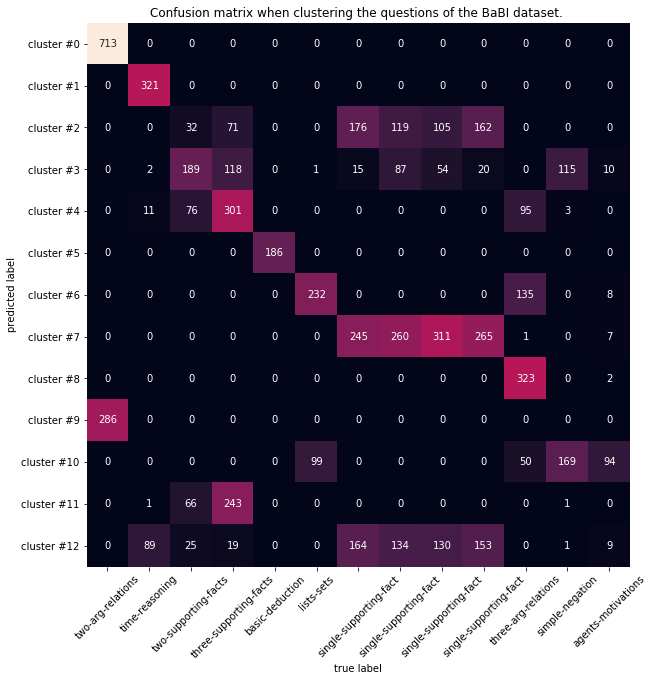

13
ars: 0.36046123193936175


In [29]:
plt.figure(figsize=(10, 10))
sss = sns.heatmap(matt.T, square=True,
            annot=True,
            fmt='d', cbar=False,
            xticklabels=True,
            yticklabels=True
            )

values, counts = np.unique(bibi_reasoning_types, return_counts=True)

count_per_label = dict(zip(counts, values))

new_label_ordering = [count_per_label[c] for c in np.sum(matt, axis=1)]

y_labels = ['cluster #' + str(i) for i in range(len(unique_reasoning_types))]
sss.set_xticklabels(new_label_ordering, rotation=45)
sss.set_yticklabels(y_labels, rotation=0)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion matrix when clustering the questions of the BaBI dataset. ')
plt.show()
print(len(unique_reasoning_types))

ars = metrics.adjusted_rand_score(labelsss, bibi_reasoning_type_indices)
print("ars: " + str(ars))

In [64]:
# couts of the types  
values, counts = np.unique(bibi_reasoning_types, return_counts=True)

count_per_label = dict(zip(counts, values))

new_label_ordering = [count_per_label[c] for c in np.sum(matt, axis=1)]

values, counts,dict(zip(counts, values)), new_label_ordering

(array(['agents-motivations', 'basic-coreference', 'basic-deduction',
        'compound-coreference', 'conjunction', 'lists-sets',
        'simple-negation', 'single-supporting-fact', 'three-arg-relations',
        'three-supporting-facts', 'time-reasoning', 'two-arg-relations',
        'two-supporting-facts'], dtype='<U22'),
 array([130, 600, 186, 600, 600, 332, 289, 600, 604, 752, 424, 999, 388]),
 {130: 'agents-motivations',
  600: 'single-supporting-fact',
  186: 'basic-deduction',
  332: 'lists-sets',
  289: 'simple-negation',
  604: 'three-arg-relations',
  752: 'three-supporting-facts',
  424: 'time-reasoning',
  999: 'two-arg-relations',
  388: 'two-supporting-facts'},
 ['two-arg-relations',
  'time-reasoning',
  'two-supporting-facts',
  'three-supporting-facts',
  'basic-deduction',
  'lists-sets',
  'single-supporting-fact',
  'single-supporting-fact',
  'single-supporting-fact',
  'single-supporting-fact',
  'three-arg-relations',
  'agents-motivations',
  'simple-negation'

array([999, 424, 388, 752, 186, 332, 600, 600, 600, 600, 604, 130, 289])